In [1]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import mglearn
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np

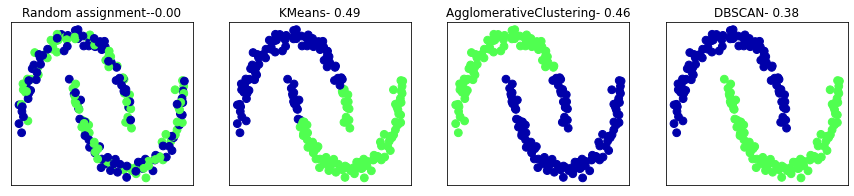

In [6]:
X ,y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1,4,figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters =2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
axes[0].scatter(X_scaled[:,0],X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3,s=60)
axes[0].set_title("Random assignment-{:.2f}".format(silhouette_score(X_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{}- {:.2f}".format(algorithm.__class__.__name__,silhouette_score(X_scaled, clusters)))

In [ ]:
'''
1. k-means gets the hight silhouette score, evenm though expect DBScan to produce results.
2. A slightly better startegy for evaluating clusters is using robustness-base clustering metrics. These run an algorithm
after adding some noise to the data, or using different parameter settings, and comparing teh output 
3. The idea is that if many algorithm parametes and many perturbations of the data return the same result, it is likely to be 
trustworthy
'''